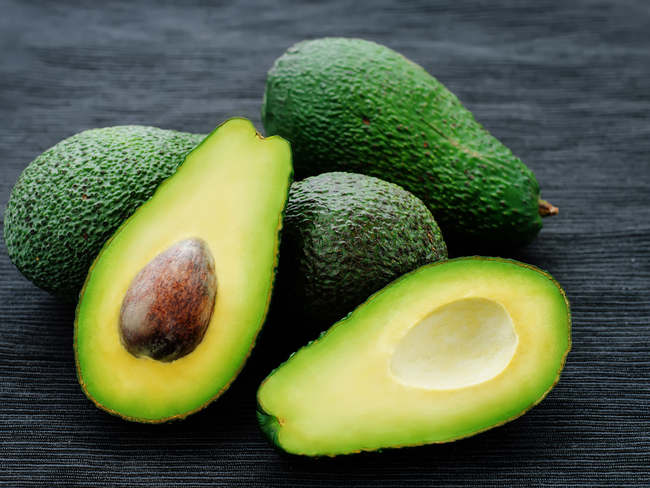

In [30]:
from IPython.display import display

# Open the image
img = Image.open('D:\Data Science\Projects\RESUME PROJECT -- PRICE PREDICTION\Fruti.jpg')

# Display the image
display(img)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv(r'D:\Data Science\Projects\RESUME PROJECT -- PRICE PREDICTION\avocado.csv',index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [2]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


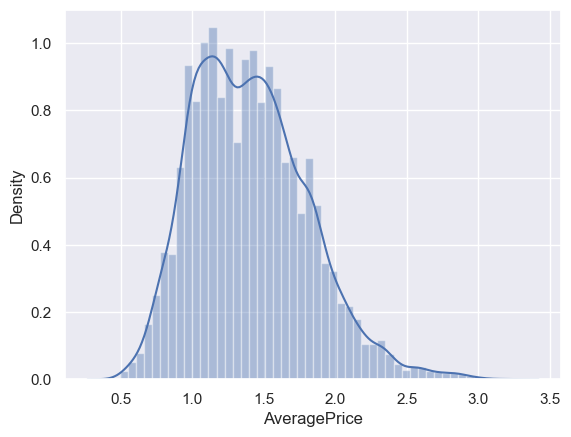

In [3]:
sns.distplot(data['AveragePrice']);

<AxesSubplot:xlabel='year', ylabel='count'>

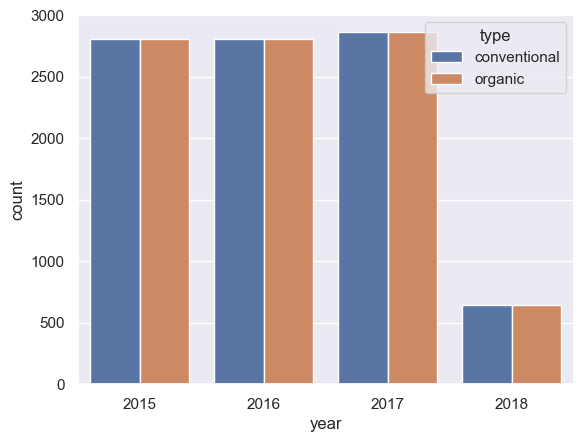

In [4]:
sns.countplot(x='year',data=data,hue='type')

In [5]:
data.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

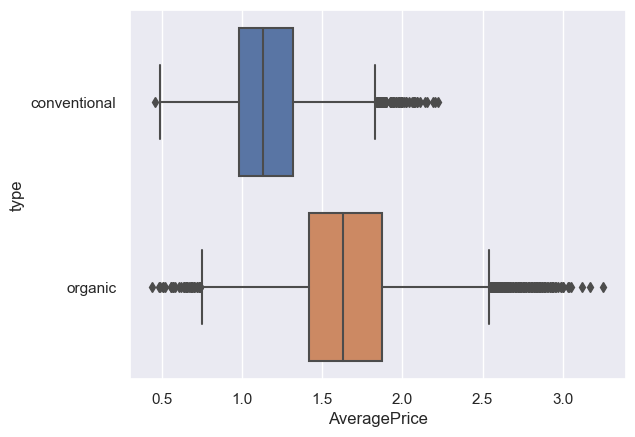

In [6]:
sns.boxplot(y='type',x='AveragePrice',data=data);

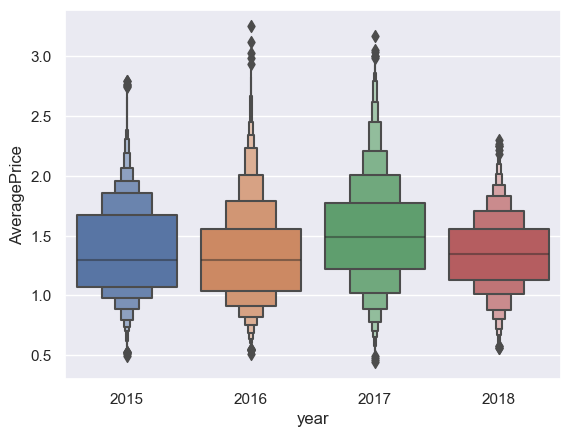

In [7]:
data.year=data.year.apply(str)
sns.boxenplot(x='year',y='AveragePrice',data=data);

In [8]:
data['type']= data['type'].map({'conventional':0,'organic':1})
data.Date=data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month=data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

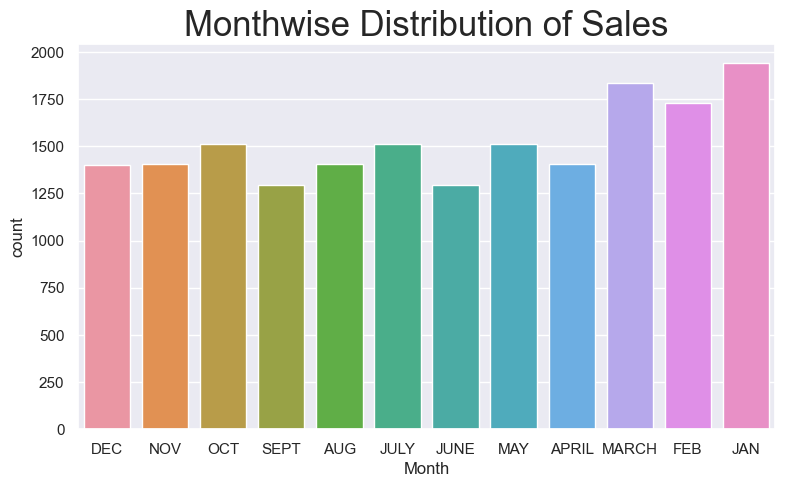

In [9]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

In [10]:
dummies=pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies=pd.concat([data[['Total Volume','4046','4225','4770','Total Bags',
        'Small Bags','Large Bags','XLarge Bags','type']],dummies],axis=1)
target=data['AveragePrice']



In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_dummies,target,test_size=0.30)
cols_to_std=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train[cols_to_std])
x_train[cols_to_std] = scaler.transform(x_train[cols_to_std])
x_test[cols_to_std] = scaler.transform(x_test[cols_to_std])

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [ ]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])